H0: Market share of Par Inc. can be increased with the introduction of a cut-resistant, longer-lasting golf ball.
H1: MArket share cannot be increased with the introduction of new golf ball.

In [1]:
# Import all the libraries
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind,mannwhitneyu,levene,shapiro
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gb = pd.read_excel('SM4-Golf.xls') # Read the file

In [3]:
gb.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [4]:
gb.info() # Check if there is any null data or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 680.0 bytes


In [5]:
gb.describe() # Check the general description of the data

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [6]:
current = gb['Current']

In [7]:
new = gb['New']

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


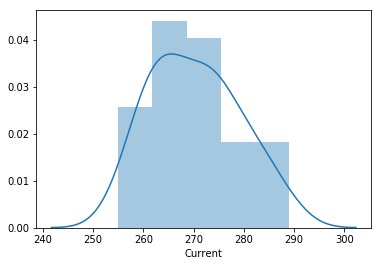

In [8]:
sns.distplot(current)

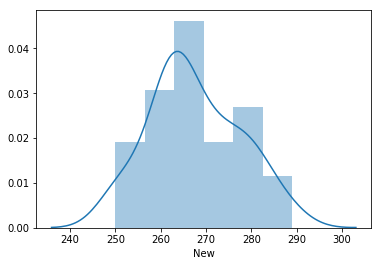

In [9]:
sns.distplot(new)

In [12]:
# Test 1:
two_sample = st.ttest_rel(current, new)
two_sample

Ttest_relResult(statistic=1.2769699827911767, pvalue=0.20916361823147053)

In [13]:
# Test 2:
t_statistics, p_value = ttest_ind(current, new)
t_statistics, p_value

(1.3283615935245678, 0.18793228491854663)

Test 2: Conclusion:
p-value is greater that 0.05, meaning that we dont have enough evidence to reject null hypothesis.


In [15]:
# Test 3:
u, p_value = mannwhitneyu(current, new)
u, p_value

(668.0, 0.10265192122893124)

Test 3: Conclusion:
p-value is greater that 0.05, meaning that we dont have enough evidence to reject null hypothesis.


In [16]:
# Test 4:
levene(current, new)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

Test 4: Conclusion:
p-value is greater that 0.05, meaning that we dont have enough evidence to reject null hypothesis.


In [16]:
shapiro (new)

(0.967826247215271, 0.30646201968193054)

In [17]:
shapiro (current)

(0.9707048535346985, 0.3787907361984253)

Calculation of Pooled Standard deviation

In [18]:
pooled_std =(np.mean(current) - np.mean(new)) / np.sqrt(((40-1)*np.var(current) + (40-1)*np.var(new)) / 40+40-2)
pooled_std

0.19431534815781365

Calculation of Power of Test

In [25]:
power_of_test = ttest_power(pooled_std, nobs = 40, alpha = 0.05, alternative = 'two-sided')

In [26]:
power_of_test

0.22407776126804432

Meaning that chances of rejecting null hypothesis are less. We do not have evidence to reject the null hypothesis.

Recommandation: Do not reject null hypothesis